1. Color-coded scatter plot

Produce a scatter plot from a dataset with two categories.

 - Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
 - Display the dataset in a scatter plot marking the two categories with different marker colors.
An example is given below:

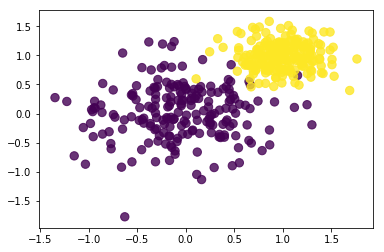

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

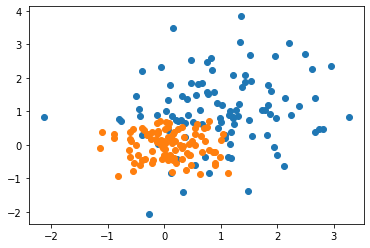

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(mean, std_dev):
    return np.random.normal(mean,std_dev,100)

x1 = gaussian(1,1)
y1 = gaussian(1,1)
plt.scatter(x1,y1)

x2 = gaussian(0,0.5)
y2 = gaussian(0,0.5)
plt.scatter(x2,y2)

plt.show()

2. Profile plot

Produce a profile plot from a scatter plot.

 - Download the following pickle file:
 
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
 - Inspect the dataset, you'll find two variables (features)
 - Convert the content to a Pandas Dataframe
 - Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
 - Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression.

Comment on the correlation between these variables.

 - Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
 - Obtain 3 numpy arrays:
    - x, the array of bin centers of the profile histogram of the "distance" variable
    - y, the mean values of the "residuals", estimated in slices (bins) of "distance"
    - err_y, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
 - Plot the profile plot on top of the scatter plot

In [23]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

data = np.load('residuals_261.pkl', allow_pickle = True).item()
data = pd.DataFrame(data)

print(data)
print(data.info())

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11131 entries, 0 to 11130
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   residuals  11131 non-null  float64
 1   distances  11131 non-null  float64
dtypes: float64(2)
memory usage: 174.0 KB
None


       residuals  distances
2          -7.20        3.4
3          -4.15        8.4
4          -6.59        1.7
5         -11.02        4.4
6          -2.27        0.6
...          ...        ...
11088      -3.26        1.4
11120      -3.51       13.9
11121      -4.38        9.6
11123      -2.64        4.6
11125      -2.66        1.9

[641 rows x 2 columns]


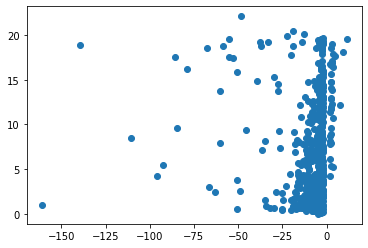

In [24]:
data.drop( data[abs(data['residuals']) < 2 ].index , inplace=True)
data = data[abs(data['residuals'])>2]
print(data)

x = data.residuals
y = data.distances
plt.scatter(x,y)
plt.show()

slope =  -0.015435375623424173  intercept =  6.637880474395569 r_value =  -0.04193588165300771 p_value =  0.28908737626979847 stderr = 0.014547848854062916
[ 3.4    8.4    1.7    4.4    0.6   19.     2.8    2.1    3.2    6.8
  3.6   11.7   13.6    7.8    7.8    4.2   18.6   10.7   16.5    0.3
  6.5    7.8   12.4   18.8    0.7    2.8    1.8   10.5    1.4   13.
  6.     1.1    8.3    8.2    6.4    2.8    1.    14.8   11.4    2.1
  1.6   18.8    3.    15.9    2.1    0.8   11.6    1.    15.1    2.
 13.4   11.4    5.7   10.9    1.1    1.4    8.4    1.6    9.2    1.2
  9.9    4.2    2.5    1.1   11.5    7.2   15.9   12.7    1.7    2.6
 11.1    1.8   16.1    7.3   14.7    7.7   11.9   11.    10.6    4.
  5.4    9.4    1.     7.3   14.     5.6    8.7    1.1    3.5    7.2
  1.7    5.5    9.6    4.9    6.8   19.1    0.9   19.5    0.4   13.1
  2.6    6.     7.3    8.2    3.8    3.3    2.     1.7    8.2   11.5
  1.3    0.7    1.3   19.1    2.5   16.45   5.48   7.9    8.2   14.9
  0.5   15.3    1.9

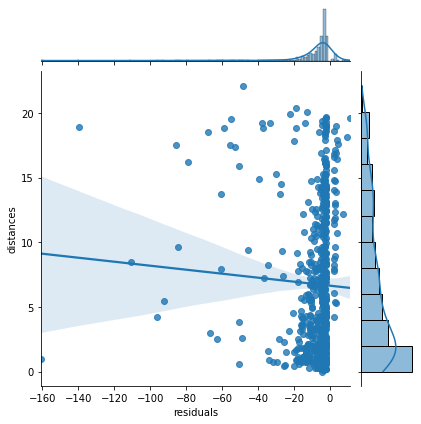

In [9]:
slope, intercept, r_value, p_value, stderr = stats.linregress(x, y)
print("slope = ",slope, " intercept = ",intercept, "r_value = ", r_value, "p_value = ", p_value, "stderr =", stderr)
sns.jointplot(data = data, x = "residuals", y = "distances", kind = "reg")

dis_array = np.array(data.distances)
bins=[0,5,10,15,20]
print(dis_array)

dis_bin=np.histogram(dis_array,bins = bins )
print(dis_bin)
binned_data=pd.cut(dis_array,bins)
print(binned_data)

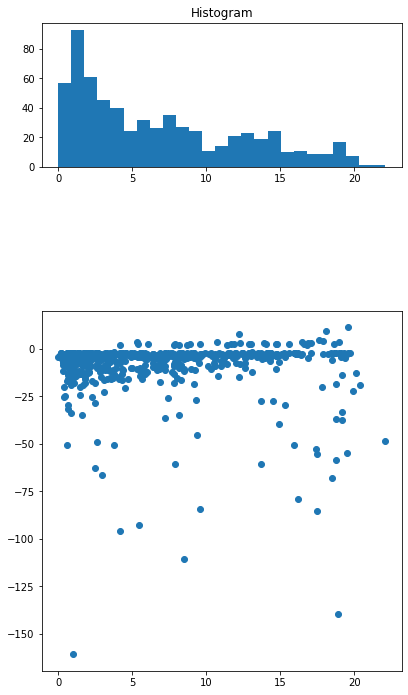

x:  [ 0.442  1.326  2.21   3.094  3.978  4.862  5.746  6.63   7.514  8.398
  9.282 10.166 11.05  11.934 12.818 13.702 14.586 15.47  16.354 17.238
 18.122 19.006 19.89  20.774 21.658]
y:  [-10.85858566   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.        ]
err_y: [18.12055212  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]
x:  [ 0.442  1.326  2.21   3.094  3.978  4.862  5.746  6.63   7.514  8.398
  9.282 10.166 11.05  11.934 12.818 13.702 14.586 15.47  16.354 17.238
 18.122 19.006 19.89  20.774 21.658]
y:  [-10.85858566  -6.83815476  

In [36]:
#Create manually (without using seaborn) the profile histogram for the \"distance\" variable

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1, 0.1, 0.5, 0.5])
ax_histx = fig.add_axes([0.1, 0.8, 0.5, 0.2], sharex=ax)
ax_histx.set_title('Histogram')
ax.scatter(data['distances'],data['residuals'])
h,bins,_ = ax_histx.hist(data['distances'],bins = 25)

x = 0.5*(bins[1:]+bins[:-1])
y = np.zeros(len(bins))
err_y = np.zeros(len(bins))
for i in range(0,len(x)-1):
    mask_i = (data['distances']>x[i]) & (data['distances']<x[i+1])
    y[i] = np.mean(data[mask_i].residuals)
    err_y[i] = np.std(data[mask_i].residuals)
    plt.show()
    print("x: ", x)
    print("y: ", y)
    print("err_y:", err_y)

3. Kernel Density Estimate

Produce a KDE for a given distribution (by hand, not using seaborn):

 - Fill a numpy array x of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
 - Fill an histogram in pyplot taking proper care of the aesthetic:
    - use a meaningful number of bins
    - set a proper y axis label
    - set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
    - display the histograms as data points with errors (the error being the poisson uncertainty)
  - For every element of x, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
  
$$ 1.06 * x.std() * x.size ^{-\\frac{1}{5}} $$

you can use the scipy function stats.norm() for that.
 - In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
 - Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the scipy.integrate.trapz() method. Superimpose the normalized sum of all gaussians to the first histogram.


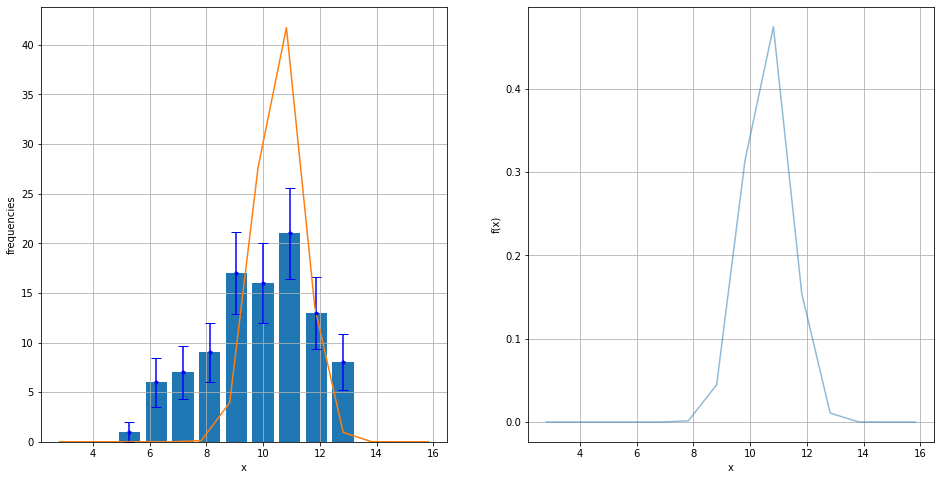

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.stats import norm

mu, sigma = 10, 2
N = 100
x = np.random.normal(mu, sigma, N)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
Nbins = 10
bins = np.arange(x.min(), x.max(), (x.max()-x.min()) / Nbins)
freq, bins, patches = ax1.hist(x = x, bins = bins, alpha = 1, histtype = 'bar', rwidth=0.8)
ax1.grid()
ax1.set_xlabel('x')
ax1.set_ylabel('frequencies')

bincenters = (bins[1:] + bins[: -1]) / (2)
ax1.errorbar(x = bincenters, y = freq, yerr = np.sqrt(freq), fmt = 'x', c = 'b', marker = '*', markersize = 4, capsize = 5)

std_def = 1.06 * x.std() * (x.size ** -0.2)
xrange = np.arange(x.min() - sigma, x.max() + sigma)
gaussians = []

for i, dat in enumerate(x):
    gaussians.append(norm(loc = dat, scale = std_def).pdf(xrange))
    ax2.plot(xrange, gaussians[i], alpha = 0.5)
    ax2.set_xlabel('x')
    ax2.set_ylabel('f(x)')
    ax2.grid()

    area = integrate.trapz(freq, dx = bins[1] - bins[0])
    kde = np.array(gaussians).sum(axis = 0)
    ax1.plot(xrange, kde / sum(kde) * area)
    plt.show()
 